In [1]:
from docplex.mp.model import Model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint, uniform

In [2]:
gen_data = pd.read_excel("gen_stations.xlsx")

In [3]:
gen_data.dropna(axis='rows', inplace=True)
gen_data.columns = ['station', 'installed_capacity', 'available_capacity','fuel_type']
gen_data.reset_index(inplace=True)
gen_data.index = gen_data.index+1
gen_data.drop('index', axis=1, inplace=True)

In [4]:
gen_data['station'] = gen_data['station'].astype('str')

In [5]:
gen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 1 to 19
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   station             19 non-null     object 
 1   installed_capacity  19 non-null     float64
 2   available_capacity  19 non-null     float64
 3   fuel_type           19 non-null     object 
dtypes: float64(2), object(2)
memory usage: 740.0+ bytes


In [6]:
gen_data['unused'] = gen_data['installed_capacity'] - gen_data['available_capacity']

In [7]:
len(gen_data['station'].unique())

19

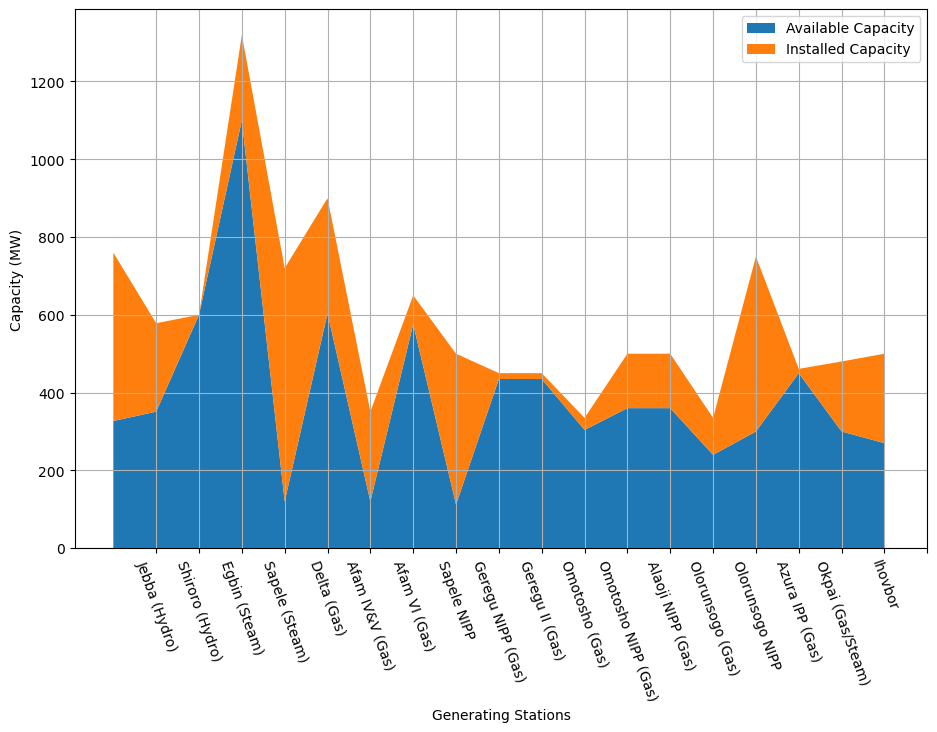

In [8]:
plt.figure(figsize=(11,7))
plt.stackplot(list(gen_data.station.values), gen_data.available_capacity, gen_data['unused'])
plt.ylabel("Capacity (MW)")
plt.xlabel("Generating Stations")
plt.xticks(np.arange(1,20, step=1),rotation=290)
plt.legend(['Available Capacity','Installed Capacity'])
plt.grid()
plt.savefig("generation capacity.png", bbox_inches='tight')

In [9]:
gen_data

,station,installed_capacity,available_capacity,fuel_type,unused
1,Kanji (Hydro),760.0,327.0,Hydro,433.0
2,Jebba (Hydro),578.4,351.0,Hydro,227.4
3,Shiroro (Hydro),600.0,600.0,Hydro,0.0
4,Egbin (Steam),1320.0,1100.0,Gas,220.0
5,Sapele (Steam),720.0,120.0,Gas,600.0
6,Delta (Gas),900.0,604.0,Gas,296.0
7,Afam IV&V (Gas),351.0,120.0,Gas,231.0
8,Afam VI (Gas),650.0,576.0,Gas,74.0
9,Sapele NIPP,500.0,112.0,Gas,388.0
10,Geregu NIPP (Gas),450.0,435.0,Gas,15.0


In [10]:
gen_data['station'] = [each_item.split('(')[0].strip() for each_item in gen_data['station']]

In [11]:
gen_data

,station,installed_capacity,available_capacity,fuel_type,unused
1,Kanji,760.0,327.0,Hydro,433.0
2,Jebba,578.4,351.0,Hydro,227.4
3,Shiroro,600.0,600.0,Hydro,0.0
4,Egbin,1320.0,1100.0,Gas,220.0
5,Sapele,720.0,120.0,Gas,600.0
6,Delta,900.0,604.0,Gas,296.0
7,Afam IV&V,351.0,120.0,Gas,231.0
8,Afam VI,650.0,576.0,Gas,74.0
9,Sapele NIPP,500.0,112.0,Gas,388.0
10,Geregu NIPP,450.0,435.0,Gas,15.0


### Linear Programming with assummed cost

In [12]:
#According to article, the average levelised cost of On-Grid Electricity Generation was randomized
# $0.05kWh ~ $0.12/kWh == $0.05*10(^-3)MWh ~ $0.12*10(^-3)MWh
# randomly generate cost of generation
# cost = [uniform(0.05*0.001, 0.12*0.001) for i in range(19)]

In [13]:
# gen_data['cost($)/MWh'] = cost

In [14]:
### The sections below works with the randomly generated cost I once generated
# gen_data = pd.read_csv("gen_data.csv", index_col=0)

In [15]:
gen_data

,station,installed_capacity,available_capacity,fuel_type,unused
1,Kanji,760.0,327.0,Hydro,433.0
2,Jebba,578.4,351.0,Hydro,227.4
3,Shiroro,600.0,600.0,Hydro,0.0
4,Egbin,1320.0,1100.0,Gas,220.0
5,Sapele,720.0,120.0,Gas,600.0
6,Delta,900.0,604.0,Gas,296.0
7,Afam IV&V,351.0,120.0,Gas,231.0
8,Afam VI,650.0,576.0,Gas,74.0
9,Sapele NIPP,500.0,112.0,Gas,388.0
10,Geregu NIPP,450.0,435.0,Gas,15.0


### Helper Functions to help add other parameters

In [16]:
# 1.**Initial Cost : $/kW **
# 2.**Fixed O&M Cost  : $/kW/yr **
# 3.**Variable O&M Cost : $kWh **
# 4. **Fuel cost: $/kWh **

In [17]:
def add_carbon_value(case):
    if case['fuel_type'] == 'Gas':
        return  2.07
    elif case['fuel_type'] == 'Hydro':
        return  0
    
def add_initial_cost(case):
    if case['fuel_type'] == 'Gas':
        return  700
    elif case['fuel_type'] == 'Hydro':
        return  2500
    
    
def fixed_o_and_m_cost(case):
    if case['fuel_type'] == 'Gas':
        return  23
    elif case['fuel_type'] == 'Hydro':
        return  70
    
    
def variable_o_and_m_cost(case):
    if case['fuel_type'] == 'Gas':
        return  0.006
    elif case['fuel_type'] == 'Hydro':
        return  0
    
def fuel_cost(case):
    if case['fuel_type'] == 'Gas':
        return  0.07
    elif case['fuel_type'] == 'Hydro':
        return  0


def estimate_capital_recovery_factor(case):
    # Life time
    gas_life = 40
    hydro_life = 60
    if case['fuel_type'] == 'Hydro':
        annuities = hydro_life
    elif case['fuel_type'] == 'Gas':
        annuities = gas_life
    discount_rate = 30/100
    
    # evaluation
    crf = (discount_rate * ((1+discount_rate)**annuities))/(((1+discount_rate)**annuities) - 1)
    return crf

In [18]:
gen_data['carbon_content'] = gen_data.apply(add_carbon_value,axis=1)
gen_data['initial_cost'] = gen_data.apply(add_initial_cost,axis=1)
gen_data['fixed_o_and_m_cost'] = gen_data.apply(fixed_o_and_m_cost,axis=1)
gen_data['variable_o_and_m_cost'] = gen_data.apply(variable_o_and_m_cost,axis=1)
gen_data['fuel_cost'] = gen_data.apply(fuel_cost,axis=1)
gen_data['cap_recovery_factor'] = gen_data.apply(estimate_capital_recovery_factor,axis=1)

In [19]:
gen_data

,station,installed_capacity,available_capacity,fuel_type,unused,carbon_content,initial_cost,fixed_o_and_m_cost,variable_o_and_m_cost,fuel_cost,cap_recovery_factor
1,Kanji,760.0,327.0,Hydro,433.0,0.00,2500,70,0.000,0.00,0.300000
2,Jebba,578.4,351.0,Hydro,227.4,0.00,2500,70,0.000,0.00,0.300000
3,Shiroro,600.0,600.0,Hydro,0.0,0.00,2500,70,0.000,0.00,0.300000
4,Egbin,1320.0,1100.0,Gas,220.0,2.07,700,23,0.006,0.07,0.300008
5,Sapele,720.0,120.0,Gas,600.0,2.07,700,23,0.006,0.07,0.300008
6,Delta,900.0,604.0,Gas,296.0,2.07,700,23,0.006,0.07,0.300008
7,Afam IV&V,351.0,120.0,Gas,231.0,2.07,700,23,0.006,0.07,0.300008
8,Afam VI,650.0,576.0,Gas,74.0,2.07,700,23,0.006,0.07,0.300008
9,Sapele NIPP,500.0,112.0,Gas,388.0,2.07,700,23,0.006,0.07,0.300008
10,Geregu NIPP,450.0,435.0,Gas,15.0,2.07,700,23,0.006,0.07,0.300008


In [20]:
# gen_data.to_csv("gen_data.csv")

In [21]:
gen_data.index = gen_data.index-1

In [22]:
## Initiate model
mdl = Model(name="Generation", cts_by_name=True)

In [23]:
def label_generators_and_set_constraint(data_frame):
    c_vars = []
    for ind in data_frame.index:
        desg_name = data_frame['station'][ind]
        des_name = desg_name
        # label the variables
        #g1,g2,g3,g4....
        desg_name = mdl.continuous_var(name=str(desg_name))
        c_vars.append(desg_name)
        #set the available capacity of each generator as constraints
        desg_constraint = data_frame['available_capacity'][ind]
        desg_x_constraint = mdl.add_constraint(desg_name<=desg_constraint, des_name)
        
    # set contraint for the maximum transmission
    # add tranmission capacity as constraint
    transmission_cap = 8100
    # g1+g2+g3+... <= 8100
    trans_cap = mdl.add_constraint(mdl.sum(c_vars) <= transmission_cap, "transmission_cap" )
    demand_cap = 19798
    demand_cap = mdl.add_constraint(mdl.sum(c_vars) <= demand_cap, "demand" )
    return c_vars

In [24]:
# name each generator and set the generation limit
c_vars = label_generators_and_set_constraint(gen_data)

In [25]:
# contraints overview
for each in mdl.iter_constraints():
    print(each)

Kanji: Kanji <= 327.0
Jebba: Jebba <= 351.0
Shiroro: Shiroro <= 600.0
Egbin: Egbin <= 1100.0
Sapele: Sapele <= 120.0
Delta: Delta <= 604.0
Afam IV&V: Afam IV&V <= 120.0
Afam VI: Afam VI <= 576.0
Sapele NIPP: Sapele NIPP <= 112.0
Geregu NIPP: Geregu NIPP <= 435.0
Geregu II: Geregu II <= 435.0
Omotosho: Omotosho <= 304.0
Omotosho NIPP: Omotosho NIPP <= 360.0
Alaoji NIPP: Alaoji NIPP <= 360.0
Olorunsogo: Olorunsogo <= 240.0
Olorunsogo NIPP: Olorunsogo NIPP <= 300.0
Azura IPP: Azura IPP <= 450.0
Okpai: Okpai <= 300.0
Ihovbor: Ihovbor <= 270.0
transmission_cap: Kanji+Jebba+Shiroro+Egbin+Sapele+Delta+Afam IV&V+Afam VI+Sapele NIPP+Geregu NIPP+Geregu II+Omotosho+Omotosho NIPP+Alaoji NIPP+Olorunsogo+Olorunsogo NIPP+Azura IPP+Okpai+Ihovbor <= 8100
demand: Kanji+Jebba+Shiroro+Egbin+Sapele+Delta+Afam IV&V+Afam VI+Sapele NIPP+Geregu NIPP+Geregu II+Omotosho+Omotosho NIPP+Alaoji NIPP+Olorunsogo+Olorunsogo NIPP+Azura IPP+Okpai+Ihovbor <= 19798


In [26]:
c_vars

[docplex.mp.Var(type=C,name='Kanji'),
 docplex.mp.Var(type=C,name='Jebba'),
 docplex.mp.Var(type=C,name='Shiroro'),
 docplex.mp.Var(type=C,name='Egbin'),
 docplex.mp.Var(type=C,name='Sapele'),
 docplex.mp.Var(type=C,name='Delta'),
 docplex.mp.Var(type=C,name='Afam IV&V'),
 docplex.mp.Var(type=C,name='Afam VI'),
 docplex.mp.Var(type=C,name='Sapele NIPP'),
 docplex.mp.Var(type=C,name='Geregu NIPP'),
 docplex.mp.Var(type=C,name='Geregu II'),
 docplex.mp.Var(type=C,name='Omotosho'),
 docplex.mp.Var(type=C,name='Omotosho NIPP'),
 docplex.mp.Var(type=C,name='Alaoji NIPP'),
 docplex.mp.Var(type=C,name='Olorunsogo'),
 docplex.mp.Var(type=C,name='Olorunsogo NIPP'),
 docplex.mp.Var(type=C,name='Azura IPP'),
 docplex.mp.Var(type=C,name='Okpai'),
 docplex.mp.Var(type=C,name='Ihovbor')]

In [27]:
mdl.get_constraint_by_name('Kanji')

docplex.mp.LinearConstraint[Kanji](Kanji,LE,327.0)

In [28]:
# cost_per_mw = gen_data['cost($)/MWh']

In [29]:
# cost_per_mw

In [30]:
# 1.**Initial Cost : $/kW **
# 2.**Fixed O&M Cost  : $/kW/yr **
# 3.**Variable O&M Cost : $kWh **
# 4. **Fuel cost: $/kWh **

In [31]:
total_initial_gen_cost = 0
total_operation_maint = 0
total_fuel_cost = 0
for each_case in range(len(c_vars)):
    
    # initial_cost = capital_recovery_factor * initial cost of gen * capacity of generation
    initial_gen_cost = gen_data['cap_recovery_factor'][each_case] * gen_data['initial_cost'][each_case] * c_vars[each_case]
    
    # operation and maintenance cost of generation = fixed o & m * capacity of generator  + varaible o & m cost of generation
    operation_maint = (c_vars[each_case] * gen_data['fixed_o_and_m_cost'][each_case]) + gen_data['variable_o_and_m_cost'][each_case]
    
    # fuel cost = fuelcost per generator($/kWh) * output of generator
    fuel_cost = (c_vars[each_case] * gen_data['fuel_cost'][each_case])
    
    # Summation done here
    total_initial_gen_cost = total_initial_gen_cost + initial_gen_cost
    total_operation_maint = total_operation_maint + operation_maint 
    total_fuel_cost = total_fuel_cost + fuel_cost

In [32]:
total_cost_obj = total_initial_gen_cost + total_operation_maint + total_fuel_cost

In [33]:
"""total_cost_obj = (cost_per_mw[1]*c_vars[0]+
             cost_per_mw[2]*c_vars[1]+
             cost_per_mw[3]*c_vars[2]+
             cost_per_mw[4]*c_vars[3]+
             cost_per_mw[5]*c_vars[4]+
             cost_per_mw[6]*c_vars[5]+
             cost_per_mw[7]*c_vars[6]+
             cost_per_mw[8]*c_vars[7]+
             cost_per_mw[9]*c_vars[8]+
             cost_per_mw[10]*c_vars[9]+
             cost_per_mw[11]*c_vars[10]+
             cost_per_mw[12]*c_vars[11]+
             cost_per_mw[13]*c_vars[12]+
             cost_per_mw[14]*c_vars[13]+
             cost_per_mw[15]*c_vars[14]+
             cost_per_mw[16]*c_vars[15]+
             cost_per_mw[17]*c_vars[16]+
             cost_per_mw[18]*c_vars[17]+
             cost_per_mw[19]*c_vars[18]
            )
            
 """

'total_cost_obj = (cost_per_mw[1]*c_vars[0]+\n             cost_per_mw[2]*c_vars[1]+\n             cost_per_mw[3]*c_vars[2]+\n             cost_per_mw[4]*c_vars[3]+\n             cost_per_mw[5]*c_vars[4]+\n             cost_per_mw[6]*c_vars[5]+\n             cost_per_mw[7]*c_vars[6]+\n             cost_per_mw[8]*c_vars[7]+\n             cost_per_mw[9]*c_vars[8]+\n             cost_per_mw[10]*c_vars[9]+\n             cost_per_mw[11]*c_vars[10]+\n             cost_per_mw[12]*c_vars[11]+\n             cost_per_mw[13]*c_vars[12]+\n             cost_per_mw[14]*c_vars[13]+\n             cost_per_mw[15]*c_vars[14]+\n             cost_per_mw[16]*c_vars[15]+\n             cost_per_mw[17]*c_vars[16]+\n             cost_per_mw[18]*c_vars[17]+\n             cost_per_mw[19]*c_vars[18]\n            )\n            \n '

In [34]:
## Adding the budget restriction constraint
# budget_restriction = mdl.add_constraints([total_cost_obj >= 0.3, total_cost_obj<=1], ["budget_lim_1", "budget_lim_2"])

In [35]:
mdl.minimize(total_cost_obj)

In [36]:
print(mdl.number_of_constraints)

21


In [38]:
solution = mdl.solve()

In [39]:
solution.display()

solution for: Generation
objective: 0.096
status: OPTIMAL_SOLUTION(2)
